In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep


In [7]:
with rio.open('C:/Users/Admin/Downloads\Bareilyoutput.tif') as src:
    bardata = src.read()
bardata.shape

(3, 3460, 2820)

In [8]:
import earthpy.spatial as es
import earthpy.plot as ep

In [13]:
#Spectral bands- 
#B2: 0.52-0.59, (green)-data[0]
#B3: 0.62-0.68, (red)-data[1]
#B4: 0.77-0.86 (NIR)-data[2]
#B3-default band for mono
bar_ndvi = es.normalized_diff(bardata[2], bardata[1])

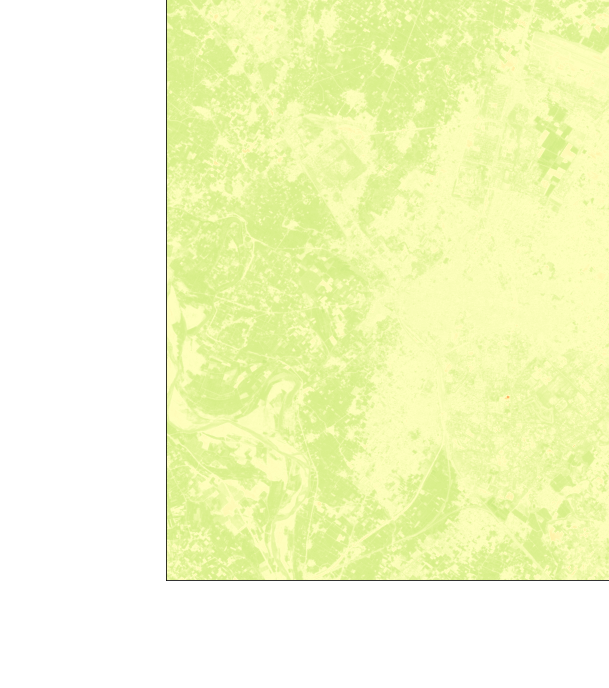

In [17]:
ep.plot_bands(bar_ndvi, cmap='RdYlGn', scale=False, vmin=-1, vmax=1,title = 'Bareily Resourcesat-2 NDVI')
plt.show()

In [18]:
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_bar_class = np.digitize(bar_ndvi, ndvi_class_bins)
ndvi_bar_class = np.ma.masked_where(np.ma.getmask(bar_ndvi), ndvi_bar_class)
np.unique(ndvi_bar_class)

masked_array(data=[1, 2, 3, 4, --],
             mask=[False, False, False, False,  True],
       fill_value=999999,
            dtype=int64)

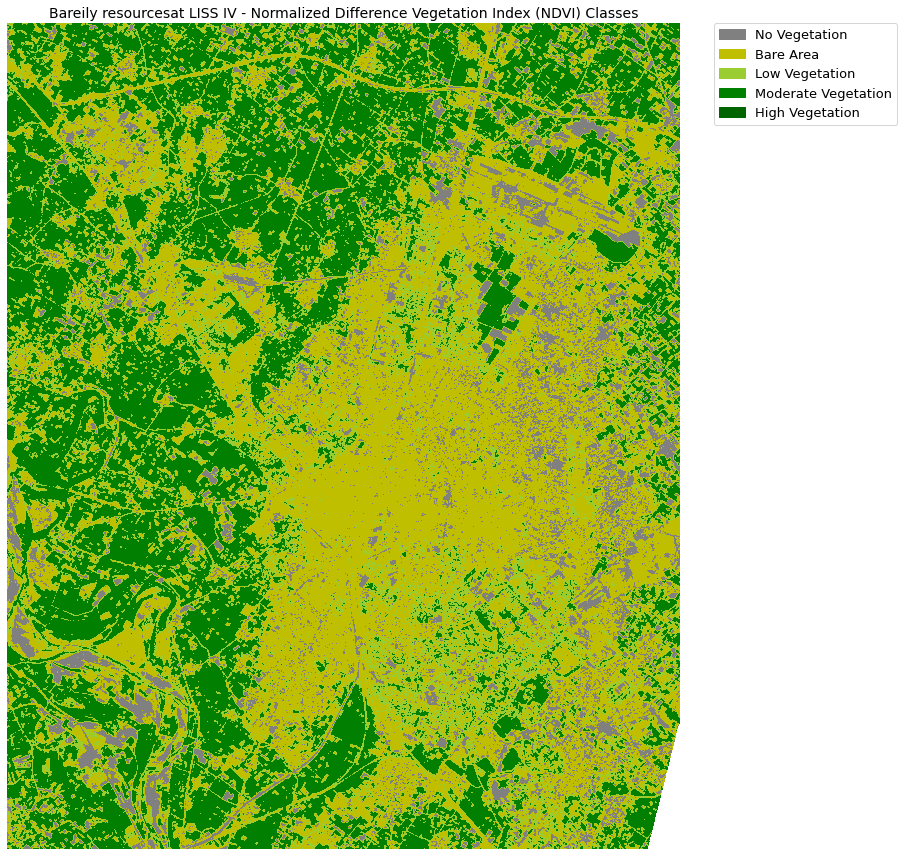

In [20]:
from matplotlib.colors import ListedColormap
# Define color map
nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_bar_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_bar_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Bareily resourcesat LISS IV - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()